# Week 4
#### Reading the cleaned data from the csv
And assuming the data is cleaned already, we won't check anything

In [1]:
import pandas as pd
data = pd.read_csv("../week2/cleaned_playstore.csv", index_col=0)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


### Task 1 
Find if there is a correlation between the price of the apps and the Content Rating (Teen, Everyone, Mature. etc). 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
one_hot_df = pd.get_dummies(data['Content Rating'], prefix='Content Rating')

In [4]:
merged_df = pd.concat([one_hot_df, data['Price']], axis = 1)
correlations = merged_df.corr()['Price'].drop('Price')

In [5]:
corr_matrix = correlations.values.reshape(-1,1)

In [6]:
correlations

Content Rating_Adults only 18+   -0.001150
Content Rating_Everyone           0.016444
Content Rating_Everyone 10+      -0.007333
Content Rating_Mature 17+        -0.010259
Content Rating_Teen              -0.009582
Content Rating_Unrated           -0.000939
Name: Price, dtype: float64

<Axes: >

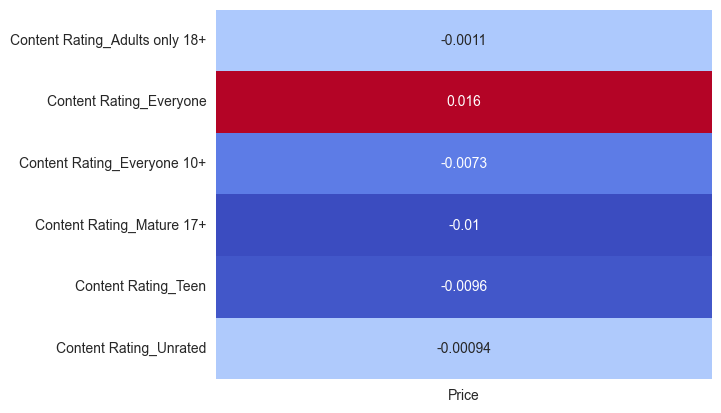

In [7]:
sns.set_style('white')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=False,
             xticklabels=['Price'], yticklabels=correlations.index.values)

### Task 2.1
Find the sentiment of all apps using np files

In [35]:
neg = list(pd.read_excel('data/n.xlsx', header= None)[0])
pos = list(pd.read_excel('data/p.xlsx',header= None)[0])
reviews = pd.read_csv('../week2/cleaned_playstore_reviews.csv', index_col=0)

In [36]:
reviews.drop(columns=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

In [46]:
reviews.head()

,App,Translated_Review,Sentiment_NP
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,4
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,1
2,11st,Horrible ID verification,-1
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,1
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",-1


In [42]:
import string
sentiment_scores = []

for comment in reviews['Translated_Review']:
    score = 0

    comment = comment.translate(str.maketrans('', '', string.punctuation)).lower()

    words = comment.split()
    for word in words:
            if word in pos:
                  score += 1
            if word in neg:
                  score -= 1
            else:
                  continue

    sentiment_scores.append(score)

reviews['Sentiment_NP'] = sentiment_scores

In [47]:
reviews.head()

,App,Translated_Review,Sentiment_NP
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,4
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,1
2,11st,Horrible ID verification,-1
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,1
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",-1


### Task 2.1
Find the sentiment of all apps using Afinn library

In [49]:
from afinn import Afinn

afinn = Afinn()
sentiment_scores = []

for comment in reviews['Translated_Review']:
    score = 0

    comment = comment.translate(str.maketrans('', '', string.punctuation)).lower()

    score = afinn.score(comment)

    sentiment_scores.append(score)

reviews['Sentiment_Afinn'] = sentiment_scores

In [50]:
reviews.head()

,App,Translated_Review,Sentiment_NP,Sentiment_Afinn
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,4,13.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,1,3.0
2,11st,Horrible ID verification,-1,-3.0
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,1,4.0
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",-1,-2.0


### Task 3
For paid apps only list the top 5 highest and lowest sentiment numbers for afinn column with the name of the app and the app category